<a href="https://colab.research.google.com/github/adamgarai98/UCL_MSc_Project/blob/main/Dataset_Creation_Analysis/Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary analysis of the created dataframes from Dataset_Creation.ipynb

#Imports

In [1]:
from google.colab import drive, files
import os
drive.mount('/content/drive/')

# set script location to own development space
MY_DEVELOPMENT_SPACE = '/content/drive/MyDrive/NHM_Project/'
os.chdir(MY_DEVELOPMENT_SPACE)

Mounted at /content/drive/


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array
from keras import applications
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import glob

In [21]:
# Dataframe path, set to own path
dataframe_path = MY_DEVELOPMENT_SPACE + "dataframes/"

# Import all csv files as dataframes



In [4]:
dataset = pd.read_csv(dataframe_path + 'dataset.csv', index_col=0)

lateralDF = pd.read_csv(dataframe_path + 'lateralDF.csv', index_col=0)
dorsalDF = pd.read_csv(dataframe_path + 'dorsalDF.csv', index_col=0)

trainDF_lat = pd.read_csv(dataframe_path + 'trainDF_lat.csv', index_col=0)
validDF_lat = pd.read_csv(dataframe_path + 'validDF_lat.csv', index_col=0)
testDF_lat = pd.read_csv(dataframe_path + 'testDF_lat.csv', index_col=0)

trainDF_dors = pd.read_csv(dataframe_path + 'trainDF_dors.csv', index_col=0)
validDF_dors = pd.read_csv(dataframe_path + 'validDF_dors.csv', index_col=0)
testDF_dors = pd.read_csv(dataframe_path + 'testDF_dors.csv', index_col=0)

# Analysis
Simple and self explanatory analysis of given data

In [5]:
dataset.groupby(['target'])['angle'].value_counts()

target                 angle  
Ephemera vulgata       Dorsal      77
                       Lateral     77
Lebia viridis          Dorsal      63
                       Lateral     63
Leuctra fusca          Dorsal     116
                       Lateral    116
Limnephilus nigriceps  Dorsal      93
                       Lateral     93
Name: angle, dtype: int64

In [6]:
dataset['angle'].value_counts()

Lateral    349
Dorsal     349
Name: angle, dtype: int64

In [7]:
target_counts=dataset['target'].value_counts()
print(target_counts)

Leuctra fusca            232
Limnephilus nigriceps    186
Ephemera vulgata         154
Lebia viridis            126
Name: target, dtype: int64


In [8]:
#Limnephilus nigriceps = caddisfly
#Leuctra fusca = stonefly
#Ephemera vulgata = mayfly
#Lebia Veridis = Ground Beetle

dataset.target.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Leuctra fusca            33.2%
Limnephilus nigriceps    26.6%
Ephemera vulgata         22.1%
Lebia viridis            18.1%
Name: target, dtype: object

<Axes: xlabel='target', ylabel='count'>

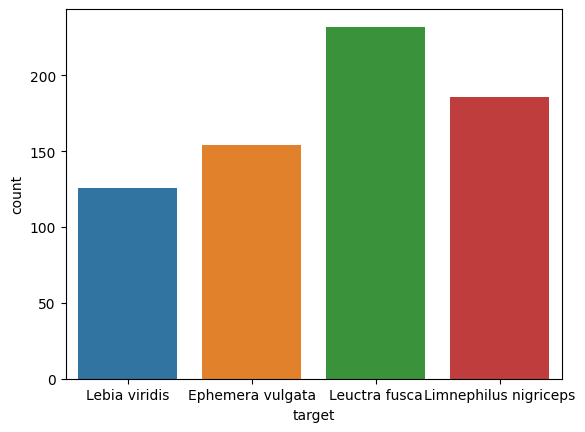

In [9]:
sns.countplot(x='target', data=dataset)

In [10]:
trainDF_lat.shape

(209, 3)

In [11]:
validDF_lat.shape

(70, 3)

In [12]:
testDF_lat.shape

(70, 3)

In [13]:
lateralDF['target'].value_counts()

Leuctra fusca            116
Limnephilus nigriceps     93
Ephemera vulgata          77
Lebia viridis             63
Name: target, dtype: int64

In [14]:
dorsalDF['target'].value_counts()

Leuctra fusca            116
Limnephilus nigriceps     93
Ephemera vulgata          77
Lebia viridis             63
Name: target, dtype: int64

In [15]:
trainDF_lat['target'].value_counts()

Leuctra fusca            74
Limnephilus nigriceps    53
Ephemera vulgata         43
Lebia viridis            39
Name: target, dtype: int64

In [16]:
trainDF_dors['target'].value_counts()

Leuctra fusca            74
Limnephilus nigriceps    53
Ephemera vulgata         43
Lebia viridis            39
Name: target, dtype: int64

In [17]:
validDF_lat['target'].value_counts()

Leuctra fusca            21
Ephemera vulgata         18
Limnephilus nigriceps    17
Lebia viridis            14
Name: target, dtype: int64

In [18]:
validDF_dors['target'].value_counts()

Leuctra fusca            21
Ephemera vulgata         18
Limnephilus nigriceps    17
Lebia viridis            14
Name: target, dtype: int64

In [19]:
testDF_lat['target'].value_counts()

Limnephilus nigriceps    23
Leuctra fusca            21
Ephemera vulgata         16
Lebia viridis            10
Name: target, dtype: int64

In [20]:
testDF_dors['target'].value_counts()

Limnephilus nigriceps    23
Leuctra fusca            21
Ephemera vulgata         16
Lebia viridis            10
Name: target, dtype: int64